<img src='images/Practicum_AI_Logo.white_outline.svg' width=250 alt='Practicum AI logo'> <img src='https://github.com/PracticumAI/practicumai.github.io/blob/main/images/icons/practicumai_beginner.png?raw=true' align='right' width=50>
***
# *Practicum AI:* Deep Learning - Multi-Classifier

This exercise adapted from Baig et al. (2020) <i>The Deep Learning Workshop</i> from <a href="https://www.packtpub.com/product/the-deep-learning-workshop/9781839219856">Packt Publishers</a> (Exercise 2.03, page 71).

#### Introduction
In this exercise, we use the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris) to create a multi-class classifier.  This is a popular educational dataset which contains 3 classes of Iris with 50 instances in each.  (The Iris is a flowering plant genus of 310 accepted species with showy flowers.)

<img alt='The Iris.' src='images/iris.png' align='right' width=360 style="float: left; padding: 10px 0px 0px 10px">

#### 1. Import libraries

Import the necessary libraries.  Note the import of pandas to support basic data wrangling tasks, the confusion matrix and accuracy score functions from SciKit-Learn, and matplotlib to visualize the data.


In [1]:
import tensorflow as tf
import pandas as pd
 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from pandas import get_dummies

%matplotlib inline

#### 2. Load the iris.csv data

In [2]:
# Place the CSV file in your data sub-folder and reference it there.
df = pd.read_csv('data/iris.csv')

# Or if using Google Colab:
# df = pd.read_csv('https://raw.githubusercontent.com/PracticumAI/deep_learning/main/data/iris.csv')

#### 3. Examine the first 5 rows of data
Use the `head()` method to examine the first 5 rows.

```python
df.head()
```

In [ ]:
# Code it!

#### 4. Visualize the data
Plot the data to see the three species of Iris in the dataset.  The x axis is sepal length while the y axis is sepal width.  The three Iris species are as follows:

- etosa (star)
- versicolor (triangle)
- virginica (circle)

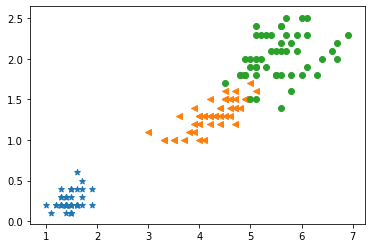

In [4]:
plt.scatter(df[df['species'] == 0]['sepallength'], df[df['species'] == 0]['sepalwidth'], marker='*')
plt.scatter(df[df['species'] == 1]['sepallength'], df[df['species'] == 1]['sepalwidth'], marker='<')
plt.scatter(df[df['species'] == 2]['sepallength'], df[df['species'] == 2]['sepalwidth'], marker='o')

#### 5. Separate the features and labels

```python
x = df[['petallength', 'petalwidth', 'sepallength', 'sepalwidth']].values
y = df['species'].values
```

In [ ]:
# Code it!

#### 6. One-hot encode the classes
The get_dummies() function converts the labels into a one-hot encoded format.

```python
y = get_dummies(y)
y = y.values
```

In [ ]:
# Code it!

#### 7. Create the features variable

```python
x = tf.Variable(x, dtype=tf.float32)
```

In [ ]:
# Code it!

#### 8. Implement the perceptron with 3 neurons
This code is similar to that used in the perceptron exercise.  However, the Number_of_units is set to 3.  Thus, the weight matrix is 4 x 3 and the bias matrix is 1 x 3.  Also, the softmax activation function is used here rather than sigmoid.

In [8]:
Number_of_features = 4
Number_of_units = 3 
 
# Weights and bias
weight = tf.Variable(tf.zeros([Number_of_features, Number_of_units]))  
bias   = tf.Variable(tf.zeros([Number_of_units]))
 
def perceptron(x):
    z = tf.add(tf.matmul(x, weight), bias)
    output = tf.nn.softmax(z)
    return output


#### 9. Create an optimizer
Create an Adam (Adaptive Momentum) optimizer.

```python
optimizer = tf.optimizers.Adam(.01)
```

In [ ]:
# Code it!

#### 10. Define the training function
Note the use of the softmax_cross_entropy_with logits loss function.

In [ ]:
# Code it!

In [12]:
def train(i):
    for n in range(i):
        loss=lambda: abs(tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=perceptron(x))))
        optimizer.minimize(loss, [weight, bias])

#### 11. Execute the training
Train the model for 1000 epochs.

```python
train(1000)
```

In [ ]:
# Code it!

#### 12. Print the weights
Print the weights to verify that learning has taken place.

```python
tf.print(weight)
```

In [ ]:
# Code it!

#### 13. Test the model's accuracy
The model's accuracy score is 98% - not bad!

```python
ypred = perceptron(x)
ypred = tf.round(ypred)
accuracy_score(y, ypred)
```

In [ ]:
# Code it!